# Inlcuding Header Files

In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve , roc_auc_score

# Process Data

In [3]:
%run process_data.ipynb import *

In [4]:
X_train , X_test , yTrain , yTest = process_data()

# Finding Optimal Hyperparameters

In [5]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf' , 'linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, yTrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.923 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.948 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.929 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.961 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.948 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [6]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


# training our Logistic SVM model.

In [7]:
# Instantiate the Support Vector Classifier (SVC)
classifier = SVC(kernel = 'rbf',C=1000, gamma=0.01, random_state = 0 , probability=True)
# Fit the model
classifier.fit(X_train, yTrain)

SVC(C=1000, gamma=0.01, probability=True, random_state=0)

# Make the predictions

In [8]:
# Make the predictions
y_pred = classifier.predict(X_test)

# Evaluating the model

In [9]:
%run evaluation.ipynb import *

In [10]:
cm , cr = confusion_mat(yTest, y_pred)
print("Confusion matrix\n\n" ,cm , "\n")
print(cr)

Confusion matrix

 [[78  1]
 [ 2  6]] 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        79
           1       0.86      0.75      0.80         8

    accuracy                           0.97        87
   macro avg       0.92      0.87      0.89        87
weighted avg       0.96      0.97      0.96        87



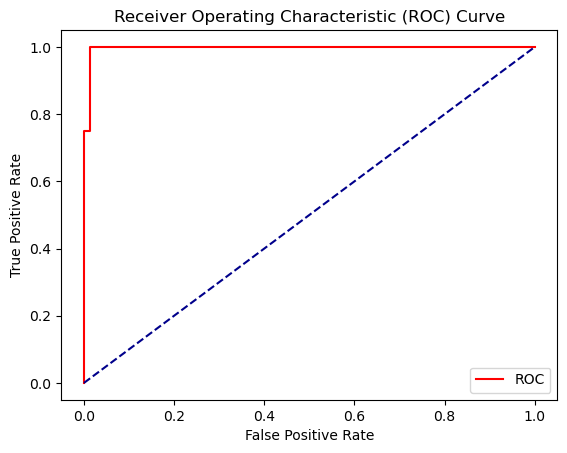

In [11]:
roc_plot(yTest, X_test)

In [12]:
score = roc_score(yTest, X_test)
print("ROC AUC Score: ", score)

ROC AUC Score:  0.9968354430379747
